In [1]:
!pip install numpy
!pip install pandas
!pip install sklearn
!pip install matplotlib
!pip install tabulate
!pip install seaborn
!pip install graphviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 62.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 72.7 MB/s eta 0:00:0000:010:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.8/24.8 MB 51.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 kB 38.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.1/38.1 MB 28.2 MB/s eta 0:00:0000:0100:01
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1304 sha256=1a5600258a1b98ba8ed9b5cebdfcbe8a1c9ed46bbb38d9e6876bebafeb473676
  Stored in directory: /home/jovyan/.cache/pip/wheels/46/ef/c3/157e41f5ee1372d1be90b09f74f82b10e391eaacca8f22d33e
Successfully built sklearn
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.2/11.2 MB 80.2 MB/s eta 0:00:0000:010:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 83.6 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96

In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder as SklearnOneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor 
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler
import datetime
from datetime import date
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import precision_score, \
    recall_score, confusion_matrix, classification_report, \
    accuracy_score, f1_score
from datetime import timedelta, date
from sklearn.metrics import mean_squared_error
import sklearn
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from tabulate import tabulate
from sklearn.metrics import precision_score, \
    recall_score, confusion_matrix, classification_report, \
    accuracy_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import export_graphviz 
from matplotlib import pyplot as plt
from sklearn import tree
import zipfile
import seaborn as sns
import os
import gc
gc.collect()

0

In [3]:
 hpg_reserve = pd.read_csv('hpg_reserve.csv.zip',compression='zip')

In [4]:
def Assining_Variables():
    fle1 = "air_visit_data.csv"
    fle2 = "air_reserve.csv"
    fle3 = "air_store_info.csv"
    fle4 = "date_info.csv"
    fle5 = "store_id_relation.csv"
    fle6 = hpg_reserve
    fle7 = "hpg_store_info.csv"
    fnl_flle = "bk.csv"
    start_dt = date(2022, 4, 23)
    end_dt = date(2712,7, 22)
    llll= []
    return fle1,fle2,fle3,fle4,fle5,fle6,fle7,fnl_flle

In [5]:
def load_dataset(fle1,fle2,fle3,fle4,fle5,fle6,fle7):
    df_air_visit_data = pd.read_csv(fle1)
    df_air_reserve = pd.read_csv(fle2)
    df_air_store_info = pd.read_csv(fle3)
    df_date_info = pd.read_csv(fle4)
    df_store_id_relation = pd.read_csv(fle5)
    df_hpg_reserve = fle6
    df_hpg_store_info = pd.read_csv(fle7)   
    return df_air_visit_data,df_air_reserve,df_air_store_info,df_date_info,df_store_id_relation,df_hpg_reserve,df_hpg_store_info

In [6]:
def Counting_NAN_Values(dfff):
        df_nan = pd.DataFrame(columns=['Nan count'])
        nan_col = list(dfff.columns.tolist())
        total_nan = 0
        for col in nan_col:
            nan_cnt = dfff[col].isnull().sum()
            df_nan.loc[col] = nan_cnt
            total_nan += nan_cnt
        print(tabulate(df_nan, headers = 'keys', tablefmt = 'psql'))
        return df_nan['Nan count']

In [7]:
def Dataset_Cleaning(dff):
        dfff = dff.isna().sum().sum()
        print("Total NAN values are : {0}".format(dfff))
        dff_nan = dff[pd.isnull(dff).any(axis=1)]
        print("Data with at least 1 NAN values: {0}".format(len(dff_nan.index)))
        df_nan_all = dff[pd.isnull(dff).all(1)]
        print("Rows filled NAN data: {0}".format(len(df_nan_all.index)))
        df_air_store = dff.air_store_id.isnull().sum()
        df_hpg_store = dff.hpg_store_id.isnull().sum()
        print("Count of NAN values on air_store_id are: {0}".format(df_air_store))
        print("Count of NAN values on hpg_store_id are: {0}".format(df_hpg_store))
        nan_ids_df = dff[dff.air_store_id.isnull() & dff.hpg_store_id.isnull()]
        len_invalid_id = len(nan_ids_df.index)
        print("Number of Invalid IDs (both air_store_id & hpg_store_id) are : {0}".format(len_invalid_id))
        df_nadn = Counting_NAN_Values(dff)
        
        """"dff['calendar_date'] = dff['calendar_date'].replace(np.nan, -1)
        dff['day_of_week'] = dff['day_of_week'].replace(np.nan, -1)
        dff['holiday_flg'] = dff['holiday_flg'].replace(np.nan, -1)
        dff['hpg_store_id'] = dff['hpg_store_id'].replace(np.nan, -1)
        #dff.drop(['calendar_date','day_of_week','holiday_flg','hpg_store_id'],axis=1,inplace=True)
        le = LabelEncoder()
        dff[['genre_name', 'area_name']] = dff[['genre_name', 'area_name']].apply(le.fit_transform)"""
        
        #Replacing NAN values of air_store_id,visit_datetime,reserve_datetime,visitors,reserve_visitors, with appropriate constant values
        """"dff[['visit_datetime','reserve_datetime']] = dff[['visit_datetime','reserve_datetime']].replace(np.nan,'9999 00:00:00.000')
        dff[['visitors','reserve_visitors']] = dff[['visitors','reserve_visitors']].replace(np.nan,0.0)
        dff['visit_date'] = dff['visit_date'].replace(np.nan,9999)
        dff[['visitors','reserve_visitors']] = dff[['visitors','reserve_visitors']].astype(int)
        dff[['air_store_id']] = dff[['air_store_id']].replace(np.nan,'air_ba937bf13d40fc25')
        #dff[['visit_datetime','reserve_datetime']] = pd.to_datetime(dff[['visit_datetime','reserve_datetime','visit_date']].astype(str),format='%Y-%m-%d')
        df_nadn = Counting_NAN_Values(dff)"""
        #dff.drop(['genre_name','area_name'],axis=1)
        #print(dff)
        return dfff,df_nadn

In [8]:
def Nan_Percent_Computation(dffff):
        nan_values_cnt,df_nafn = Dataset_Cleaning(dffff)
        total_values_cnt = dffff.shape[0]*dffff.shape[1]
        print("Total Values' Counts are : {0}".format(total_values_cnt))
        total_correct_values_cnt = (total_values_cnt - nan_values_cnt)
        print("Total Correct Values' Counts are : {0}".format(total_correct_values_cnt))
        return total_correct_values_cnt,nan_values_cnt,df_nafn

In [9]:
def Pie_Chart_NAN_Column_Plotting(dft_val1,dfg,total_crt_value_cnt,nan_value_cnt):
    dft = pd.DataFrame({'Data': ['Correct Values', 'NAN Values'],
                          'ValueCount': [total_crt_value_cnt,nan_value_cnt]})
        # Plotting the pie chart for above dataframe
    #dft.groupby(['Data']).sum().plot(kind='pie', y='Value Count', autopct='%1.0f%%')
    # Data to plot
    lab1 = dft.Data.values
    sdd = dft.ValueCount.values
    #sizes = [215, 130,215, 130,215, 130]
    color = ['lightcoral', 'lightskyblue']
    explode1 = (0.1, 0)  # explode 1st slice
    # Plot
    plt.pie(sdd, explode=explode1, labels=lab1, colors=color,autopct='%1.1f%%', shadow=True, startangle=140)
    plt.axis('equal')
    plt.show()
   
    # Define the ratio of gap of each fragment in a tuple
    #explode = (0.05, 0.05, 0.05,0.05, 0.05, 0.05,0.05, 0.05, 0.05,0.05, 0.05, 0.05,0.05, 0.05)
    # DataFrame of each student and the votes they get df_nan_disp['Data Name'],df_nan_disp['NAN Count for each Column']
    #dft = pd.DataFrame({'Data Name': dfg.columns,'NAN Count for each Column':dft_val1})
    # Plotting the pie chart for above dataframe
    # Data to plot
    #labels = dfg.columns.values
    #sddd = dft_val1.values
    #sizes = [215, 130,215, 130,215, 130,215, 130,215, 130,215, 130,215, 130]
    #colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
    #explode = (0.1, 0,0.1, 0,0.1, 0,0.1, 0,0.1, 0,0.1, 0,0.1, 0)  # explode 1st slice
    # Plot
    #plt.pie(sddd, explode=explode, labels=labels, colors=colors,autopct='%1.1f%%', shadow=True, startangle=140)
    #plt.axis('equal')
    #plt.show()

In [10]:
def Final_Dataset():
        fle1,fle2,fle3,fle4,fle5,fle6,fle7,fnl_flle = Assining_Variables()
        df_air_visit_data,df_air_reserve,df_air_store_info,df_date_info,df_store_id_relation,df_hpg_reserve,df_hpg_store_info = load_dataset(fle1,fle2,fle3,fle4,fle5,fle6,fle7)
        #df_air_visit_data,df_air_reserve,df_air_store_info,df_date_info,df_store_id_relation,df_hpg_reserve,df_hpg_store_info = self.load_dataset()
        h1,t1 = os.path.split(fle1)
        h2,t2 = os.path.split(fle2)
        h3,t3 = os.path.split(fle3)
        h4,t4 = os.path.split(fle4)
        h5,t5 = os.path.split(fle5)
        #h6,t6 = os.path.split(fle6)
        h7,t7 = os.path.split(fle7)
        print("The shape of {0} is {1}".format(t1,df_air_visit_data.shape),end="\n")
        print("The shape of {0} is {1}".format(t2,df_air_reserve.shape),end="\n")
        print("The shape of {0} is {1}".format(t3,df_air_store_info.shape),end="\n")
        print("The shape of {0} is {1}".format(t4,df_date_info.shape),end="\n")
        print("The shape of {0} is {1}".format(t5,df_store_id_relation.shape),end="\n")
        print("The shape of hpg_rserve file is {0}".format(df_hpg_reserve.shape),end="\n")
        print("The shape of {0} is {1}".format(t7,df_hpg_store_info.shape),end="\n")
        
        df_n = pd.concat([df_air_visit_data[['air_store_id','visit_date','visitors']],df_air_reserve], axis=0, join="outer")
        df_nn = pd.merge(df_n,df_air_store_info,on='air_store_id',how="left")
        df_nn = df_nn.rename(columns = {'air_genre_name':'genre_name','air_area_name':'area_name'})
        hpg_n = pd.merge(df_hpg_store_info,df_hpg_reserve,on='hpg_store_id',how="left")
        #hpg_n = pd.concat([df_hpg_store_info,df_hpg_reserve,], axis=0, join="outer")
        hpg_n = hpg_n.rename(columns = {'hpg_genre_name':'genre_name','hpg_area_name':'area_name'})
        hpg_nn = pd.merge(hpg_n,df_store_id_relation,on='hpg_store_id',how="left")
        hpg_date = pd.concat([hpg_nn,df_date_info,], axis=0, join="outer")
        df = pd.concat([df_nn,hpg_date], axis=0, join="outer")
        #hpg_date = [hpg_nn,df_date_info]
        #df_date = pd.concat(hpg_date,axis=1)
        #df_nnnn = [df_nn,df_date]
        #df = pd.concat(df_nnnn,axis=0)
        print(df)
        
 
        #Merging
        """df_n = pd.merge(df_air_visit_data[['air_store_id','visit_date','visitors']],df_air_reserve,how="outer")      
        df_nn = pd.merge(df_n,df_air_store_info,on='air_store_id',how="left")
        df_nn = df_nn.rename(columns = {'air_genre_name':'genre_name','air_area_name':'area_name'})
        hpg_n = pd.merge(df_hpg_store_info,df_hpg_reserve,on='hpg_store_id',how="left")
        hpg_n = hpg_n.rename(columns = {'hpg_genre_name':'genre_name','hpg_area_name':'area_name'})
        hpg_nn = pd.merge(hpg_n,df_store_id_relation,on='hpg_store_id',how="left")
        hpg_date = [hpg_nn,df_date_info]
        df_date = pd.concat(hpg_date,axis=1)
        df_nnnn = [df_nn,df_date]
        df = pd.concat(df_nnnn,axis=0)
        print(df)"""
        #df_nadjn = Counting_NAN_Values(df)
        
        total_crt_value_cnt,nan_value_cnt,df_najn = Nan_Percent_Computation(df)
        #Pie_Chart_Plotting(total_crt_value_cnt,nan_value_cnt)
        df_nan_disp = pd.DataFrame()
        Pie_Chart_NAN_Column_Plotting(df_najn,df,total_crt_value_cnt,nan_value_cnt)
        
        #Printing the number of NANs in each column
        n_rows = len(df)
        for i in range(0,len(df_najn)):
            nan_percent_in_each_col = ((df_najn/n_rows)*100)
            df_nan_disp = pd.DataFrame({'% of NAN Count':nan_percent_in_each_col})
        print(tabulate(df_nan_disp, headers = 'keys', tablefmt = 'psql'))
        #print(df)
        #print(df)
        
        #df = df.dropna(subset=['visitors'],inplace=True)
        #print(df)
       # from sklearn.impute import SimpleImputer
        #df = SimpleImputer(strategy='constant',fill_value='air_8093d0b565e9dbdf')
        """from sklearn.preprocessing import OneHotEncoder
        from sklearn.compose import ColumnTransformer"""
        """cat_feat = ['air_store_id']
        one_hot = OneHotEncoder()
        transformer = ColumnTransformer([("one_hot",one_hot,cat_feat)],remainder="passthrough")
        transformed_X = transformer.fit_transform(df)
        print(transformed_X)"""
        """total_crt_value_cnt1,nan_value_cnt1,df_najn1 = Nan_Percent_Computation(df)
        #Pie_Chart_Plotting(total_crt_value_cnt,nan_value_cnt)
        df_nan_disp1 = pd.DataFrame()
        #Pie_Chart_NAN_Column_Plotting(df_najn1,df,total_crt_value_cnt,nan_value_cnt)
        
        #Printing the number of NANs in each column
        n_rows1 = len(df)
        for i in range(0,len(df_najn1)):
            nan_percent_in_each_col1 = ((df_najn1/n_rows1)*100)
            df_nan_disp1 = pd.DataFrame({'% of NAN Count':nan_percent_in_each_col1})
        print(tabulate(df_nan_disp1, headers = 'keys', tablefmt = 'psql'))"""
        #print(df)
        print(df.air_store_id.value_counts())
        print(df.visit_date.value_counts())
        print(df.visitors.value_counts())
        print(df.visit_datetime.value_counts())
        print(df.reserve_datetime.value_counts())
        print(df.reserve_visitors.value_counts())
        print(df.genre_name.value_counts())
        print(df.area_name.value_counts())
        print(df.latitude.value_counts())
        print(df.longitude.value_counts())
        print(df.hpg_store_id.value_counts())
        
        df.drop(['calendar_date','day_of_week','holiday_flg'],axis=1,inplace=True)
        #df.drop(df['calendar_date'],axis=1,inplace=True)
        """df[['visit_date','visitors','visit_datetime','reserve_datetime','reserve_visitors','hpg_store_id']] = df[['visit_date','visitors','visit_datetime','reserve_datetime','reserve_visitors','hpg_store_id']].replace(np.nan,9999)
        #df[['latitude','longitude','visit_datetime','reserve_datetime','reserve_visitors','hpg_store_id','hpg_area_name','hpg_genre_name']] = df[['latitude','longitude','visit_datetime','reserve_datetime','reserve_visitors','hpg_store_id','hpg_area_name','hpg_genre_name']].replace(np.nan,9999)
        df[['area_name','latitude','longitude','genre_name']] = df[['area_name','latitude','longitude','genre_name']].replace(np.nan,9999)
        df.drop(df.index[df['latitude'] == 9999], inplace=True)
        df.drop(df.index[df['longitude'] == 9999], inplace=True)
        #df.drop(df.index[df['visit_datetime'] == 9999], inplace=True)
        #df.drop(df.index[df['reserve_datetime'] == 9999], inplace=True)
        #df.drop(df.index[df['reserve_visitors'] == 9999], inplace=True)
        #df.drop(df.index[df['hpg_store_id'] == 9999], inplace=True)"""
        #df['air_store_id'] = df['air_store_id'].replace(np.nan,9999)
        #df.drop(df.index[df['air_store_id'] == 9999], inplace=True)
        """df.drop(df.index[df['area_name'] == 9999], inplace=True)
        df.drop(df.index[df['genre_name'] == 9999], inplace=True)
        #df[['visitors']] = df[['visitors']].astype(int)
        #df.reset_index()"""
        df['air_store_id'] = df['air_store_id'].replace(np.nan,"air_8093d0b565e9dbdf")
        df.drop(df.index[df['air_store_id'] == "air_8093d0b565e9dbdf"], inplace=True)
        df['visit_datetime'] = df['visit_datetime'].replace(np.nan,"2016-12-22 19:00:00")
        #df.drop(df.index[df['visit_datetime'] == "2016-12-22 19:00:00"], inplace=True)
        df['reserve_datetime'] = df['reserve_datetime'].replace(np.nan,"2016-12-12 21:00:00")
        #df.drop(df.index[df['reserve_datetime'] == "2016-12-12 21:00:00"], inplace=True)
        df['hpg_store_id'] = df['hpg_store_id'].replace(np.nan,"hpg_011e799ba201ad2e")
        df['visit_date'] = df['visit_date'].replace(np.nan,"17-03-2017")
        df['reserve_visitors'] = df['reserve_visitors'].replace(np.nan,2.0)
        df['visitors'] = df['visitors'].replace(np.nan,8.0)
        #df.drop(df.index[df['reserve_visitors'] == 2.0], inplace=True)
        print(df)
        df_nadbjn = Counting_NAN_Values(df)
        

        #print(df[['air_store_id','visit_date','visit_datetime','reserve_datetime','reserve_visitors','genre_name','area_name','latitude','longitude','hpg_store_id']].value_counts())
        #print(df[['air_store_id','visit_date','visitors']])
        return df,fnl_flle

        #df = df[df['air_store_id'] != 9999]
        #df.drop(['air_store_id'],axis=0,inplace=True)
        
        #dff = self.Merge_dataframe(dff)
        
        #print(len(dff[['air_store_id','visit_date','visitors']]))

The shape of air_visit_data.csv is (252108, 3)
The shape of air_reserve.csv is (92378, 4)
The shape of air_store_info.csv is (829, 5)
The shape of date_info.csv is (517, 3)
The shape of store_id_relation.csv is (150, 2)
The shape of hpg_rserve file is (2000320, 4)
The shape of hpg_store_info.csv is (4690, 5)
             air_store_id  visit_date  visitors visit_datetime  \
0    air_ba937bf13d40fb24  13-01-2016      25.0            NaN   
1    air_ba937bf13d40fb24  14-01-2016      32.0            NaN   
2    air_ba937bf13d40fb24  15-01-2016      29.0            NaN   
3    air_ba937bf13d40fb24  16-01-2016      22.0            NaN   
4    air_ba937bf13d40fb24  18-01-2016       6.0            NaN   
..                    ...         ...       ...            ...   
512                   NaN         NaN       NaN            NaN   
513                   NaN         NaN       NaN            NaN   
514                   NaN         NaN       NaN            NaN   
515                   NaN     

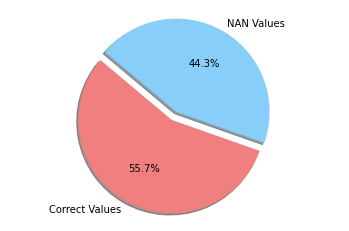

+------------------+------------------+
|                  |   % of NAN Count |
|------------------+------------------|
| air_store_id     |       70.5656    |
| visit_date       |       79.2727    |
| visitors         |       79.2727    |
| visit_datetime   |       20.7698    |
| reserve_datetime |       20.7698    |
| reserve_visitors |       20.7698    |
| genre_name       |        0.0425056 |
| area_name        |        0.0425056 |
| latitude         |        0.0425056 |
| longitude        |        0.0425056 |
| hpg_store_id     |       28.3647    |
| calendar_date    |       99.9575    |
| day_of_week      |       99.9575    |
| holiday_flg      |       99.9575    |
+------------------+------------------+
air_8093d0b565e9dbdf    2731
air_0a74a5408a0b8642    2438
air_e55abd740f93ecc4    2316
air_6d65542aa43b598b    1837
air_cf5ab75a0afb8af9    1811
                        ... 
air_9c6787aa03a45586      70
air_bb4ff06cd661ee9b      68
air_8e8f42f047537154      62
air_789103bf53b8096

In [11]:
df,fnl_flle = Final_Dataset()

In [12]:
print(df)

                air_store_id  visit_date  visitors       visit_datetime  \
15077   air_f690c42545146e0a  27-01-2016      12.0  2016-12-22 19:00:00   
15078   air_f690c42545146e0a  28-01-2016       8.0  2016-12-22 19:00:00   
15079   air_f690c42545146e0a  29-01-2016      19.0  2016-12-22 19:00:00   
15080   air_f690c42545146e0a  30-01-2016      12.0  2016-12-22 19:00:00   
15081   air_f690c42545146e0a  03-02-2016       3.0  2016-12-22 19:00:00   
...                      ...         ...       ...                  ...   
870368  air_fc477473134e9ae5  17-03-2017       8.0  2017-04-10 20:00:00   
870369  air_fc477473134e9ae5  17-03-2017       8.0  2017-04-14 21:00:00   
870370  air_fc477473134e9ae5  17-03-2017       8.0  2017-04-15 20:00:00   
870371  air_fc477473134e9ae5  17-03-2017       8.0  2017-04-16 21:00:00   
870372  air_fc477473134e9ae5  17-03-2017       8.0  2017-04-23 21:00:00   

           reserve_datetime  reserve_visitors     genre_name  \
15077   2016-12-12 21:00:00        

In [13]:
from sklearn.preprocessing import LabelEncoder

#create instance of label encoder
lab = LabelEncoder()

#perform label encoding on 'team' column
df['air_store_id'] = lab.fit_transform(df['air_store_id'])
df['hpg_store_id'] = lab.fit_transform(df['hpg_store_id'])
df['area_name'] = lab.fit_transform(df['area_name'])
df['genre_name'] = lab.fit_transform(df['genre_name'])
df['visit_date'] = lab.fit_transform(df['visit_date'])
df['reserve_datetime'] = lab.fit_transform(df['reserve_datetime'])
df['visit_datetime'] = lab.fit_transform(df['visit_datetime'])
df

,air_store_id,visit_date,visitors,visit_datetime,reserve_datetime,reserve_visitors,genre_name,area_name,latitude,longitude,hpg_store_id
15077,240,411,12.0,1918,5055,2.0,14,24,43.056819,141.353957,0
15078,240,426,8.0,1918,5055,2.0,14,24,43.056819,141.353957,0
15079,240,441,19.0,1918,5055,2.0,14,24,43.056819,141.353957,0
15080,240,455,12.0,1918,5055,2.0,14,24,43.056819,141.353957,0
15081,240,33,3.0,1918,5055,2.0,14,24,43.056819,141.353957,0
...,...,...,...,...,...,...,...,...,...,...,...
870368,247,260,8.0,2574,6908,2.0,0,25,43.055047,141.353236,19
870369,247,260,8.0,2598,6851,15.0,0,25,43.055047,141.353236,19
870370,247,260,8.0,2603,6948,3.0,0,25,43.055047,141.353236,19
870371,247,260,8.0,2610,6972,2.0,0,25,43.055047,141.353236,19


In [14]:
X = df.drop("visitors",axis=1)
y = df['visitors']

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() #saga solver requires features to be scaled for model conversion
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [17]:
def Performance_Evaluation():
    clf = LogisticRegression(penalty='l2',max_iter=20000, solver='sag',C=10.0)
    clf.fit(X_train,y_train)
    y_pred_ts = clf.predict(X_test)
    y_pred_tr = clf.predict(X_train)
    print("Predicted values:")
    print(y_pred_ts)
    print ('Training Accuracy:',  clf.score(X_train,y_pred_tr)*100) 
    print ('Test Accuracy:',  clf.score(X_test,y_pred_ts)*100)
    ts_acc = clf.score(X_test,y_pred_ts)*100
    tr_acc = clf.score(X_train,y_pred_tr)*100
    Mean_acc = (((ts_acc+tr_acc)/2))
    print ('Accuracy is: {0}'.format(Mean_acc)) 
    return y_pred_ts,clf,y_pred_tr

In [18]:
y_pred_ts,clf,y_pred_tr = Performance_Evaluation()

Predicted values:
[8. 8. 8. ... 8. 8. 8.]
Training Accuracy: 100.0
Test Accuracy: 100.0
Accuracy is: 100.0


In [19]:
print("Training before tuning\n")
print ('MAE:', mean_absolute_error(y_train, y_pred_tr))
print ('MSE:', mean_squared_error(y_train, y_pred_tr))
print ('RMSE:', np.sqrt(mean_squared_error(y_train, y_pred_tr)))
print ('RMSLE:', np.log(np.sqrt(mean_squared_error(y_train, y_pred_tr))))
print ('R2:', r2_score(y_train, y_pred_tr))
print("Test before tuning\n")
print ('MAE:', mean_absolute_error(y_test, y_pred_ts))
print ('MSE:', mean_squared_error(y_test, y_pred_ts))
print ('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred_ts)))
print ('RMSLE:', np.log(np.sqrt(mean_squared_error(y_test, y_pred_ts))))
print ('R2:', r2_score(y_test, y_pred_ts))

Training before tuning

MAE: 2.635049084637835
MSE: 78.74834173520827
RMSE: 8.874026241521278
RMSLE: 2.1831286100766727
R2: -0.08227600180385997
Test before tuning

MAE: 2.690185676392573
MSE: 86.75915119363395
RMSE: 9.31445925395747
RMSLE: 2.2315679512635795
R2: -0.0735628473118295


In [20]:
print(clf.get_params())

{'C': 10.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 20000, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'sag', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


In [21]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
c = np.linspace(1,200)
max_itr = np.linspace(1,1000)
penalty = ['l1','l2']
solver=['sag','saga','liblinear','newton-cg','lbfs']
hyperparameters = dict(C=c,penalty=penalty,max_iter=max_itr,solver=solver)

# Create the random grid
random_grid = {'penalty': penalty,
                'C':c,
              'solver':solver,
              'max_iter':max_itr}
print(random_grid)

{'penalty': ['l1', 'l2'], 'C': array([  1.        ,   5.06122449,   9.12244898,  13.18367347,
        17.24489796,  21.30612245,  25.36734694,  29.42857143,
        33.48979592,  37.55102041,  41.6122449 ,  45.67346939,
        49.73469388,  53.79591837,  57.85714286,  61.91836735,
        65.97959184,  70.04081633,  74.10204082,  78.16326531,
        82.2244898 ,  86.28571429,  90.34693878,  94.40816327,
        98.46938776, 102.53061224, 106.59183673, 110.65306122,
       114.71428571, 118.7755102 , 122.83673469, 126.89795918,
       130.95918367, 135.02040816, 139.08163265, 143.14285714,
       147.20408163, 151.26530612, 155.32653061, 159.3877551 ,
       163.44897959, 167.51020408, 171.57142857, 175.63265306,
       179.69387755, 183.75510204, 187.81632653, 191.87755102,
       195.93877551, 200.        ]), 'solver': ['sag', 'saga', 'liblinear', 'newton-cg', 'lbfs'], 'max_iter': array([   1.        ,   21.3877551 ,   41.7755102 ,   62.16326531,
         82.55102041,  102.93877551,

In [24]:
rf_random = RandomizedSearchCV(clf, hyperparameters, n_iter = 5, cv = 5, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] END C=191.8775510204082, max_iter=306.81632653061223, penalty=l1, solver=lbfs; total time=   0.0s
[CV] END C=191.8775510204082, max_iter=306.81632653061223, penalty=l1, solver=lbfs; total time=   0.0s
[CV] END C=191.8775510204082, max_iter=306.81632653061223, penalty=l1, solver=lbfs; total time=   0.0s
[CV] END C=191.8775510204082, max_iter=306.81632653061223, penalty=l1, solver=lbfs; total time=   0.0s
[CV] END C=191.8775510204082, max_iter=306.81632653061223, penalty=l1, solver=lbfs; total time=   0.0s


/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,


[CV] END C=126.89795918367348, max_iter=592.2448979591837, penalty=l2, solver=sag; total time=  49.9s
[CV] END C=126.89795918367348, max_iter=592.2448979591837, penalty=l2, solver=sag; total time=  51.5s
[CV] END C=126.89795918367348, max_iter=592.2448979591837, penalty=l2, solver=sag; total time=  51.2s
[CV] END C=126.89795918367348, max_iter=592.2448979591837, penalty=l2, solver=sag; total time=  50.2s
[CV] END C=126.89795918367348, max_iter=592.2448979591837, penalty=l2, solver=sag; total time=  50.1s
[CV] END C=5.061224489795919, max_iter=734.9591836734694, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=5.061224489795919, max_iter=734.9591836734694, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=5.061224489795919, max_iter=734.9591836734694, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=5.061224489795919, max_iter=734.9591836734694, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=5.061224489795919, max_iter=734.9591836734694, penalty=l1, solver=sag; tota

/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
15 fits failed out of a total of 25.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 436, in _

RandomizedSearchCV(cv=5,
                   estimator=LogisticRegression(C=10.0, max_iter=20000,
                                                solver='sag'),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'C': array([  1.        ,   5.06122449,   9.12244898,  13.18367347,
        17.24489796,  21.30612245,  25.36734694,  29.42857143,
        33.48979592,  37.55102041,  41.6122449 ,  45.67346939,
        49.73469388,  53.79591837,  57.85714286,  61.91836735,
        65.97959184,  70.04081633,  74.102...
        571.85714286,  592.24489796,  612.63265306,  633.02040816,
        653.40816327,  673.79591837,  694.18367347,  714.57142857,
        734.95918367,  755.34693878,  775.73469388,  796.12244898,
        816.51020408,  836.89795918,  857.28571429,  877.67346939,
        898.06122449,  918.44897959,  938.83673469,  959.2244898 ,
        979.6122449 , 1000.        ]),
                                        'penalty': ['l1', 'l2'],
                  

In [25]:
print(rf_random.best_params_)

{'solver': 'sag', 'penalty': 'l2', 'max_iter': 143.71428571428572, 'C': 175.63265306122452}


In [26]:
y_pred1 = rf_random.predict(X_test)
y_pred2 = rf_random.predict(X_train)
print("Predicted values:")
print(y_pred1)
print ('Test Accuracy:',  rf_random.score(X_test,y_pred1)*100)
print ('Training Accuracy:',  rf_random.score(X_train,y_pred2)*100) 

Predicted values:
[8. 8. 8. ... 8. 8. 8.]
Test Accuracy: 100.0
Training Accuracy: 100.0


In [27]:
print("Training after tuning\n")
print ('MAE:', mean_absolute_error(y_train, y_pred2))
print ('MSE:', mean_squared_error(y_train, y_pred2))
print ('RMSE:', np.sqrt(mean_squared_error(y_train, y_pred2)))
print ('RMSLE:', np.log(np.sqrt(mean_squared_error(y_train, y_pred2))))
print ('R2:', r2_score(y_train, y_pred2))
print("Test after tuning\n")
print ('MAE:', mean_absolute_error(y_test, y_pred1))
print ('MSE:', mean_squared_error(y_test, y_pred1))
print ('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred1)))
print ('RMSLE:', np.log(np.sqrt(mean_squared_error(y_test, y_pred1))))
print ('R2:', r2_score(y_test, y_pred1))

Training after tuning

MAE: 2.6326611833377553
MSE: 78.7009816927567
RMSE: 8.871357376002655
RMSLE: 2.182827814602619
R2: -0.08162511016271123
Test after tuning

MAE: 2.6877984084880637
MSE: 86.73766578249337
RMSE: 9.313305846072778
RMSLE: 2.2314441137683168
R2: -0.07329698556880393
